# Portfolio Assignment 1 (M4): SGD Mechanics & Attention Context

### Group Members:

Maleha Afzal

Faraiba Farnan

Cristian Smoilis

## Part A: Manual Stochastic Gradient Descent

The objective of this section is to manually demonstrate how stochastic gradient descent updates a model parameter over individual samples.

A simple linear model with a single weight is used:
ŷ = x · w

The focus is on understanding the learning mechanics of SGD rather than achieving high model performance.


In [ ]:
import pandas as pd

df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
data = list(zip(df["age"][:3], df["expenses"][:3]))

### Dataset Selection

The Kaggle insurance dataset was used.  
The feature **age** was selected as the input (x), and **expenses** as the target (t).

Only the first three samples were used in order to manually trace the stochastic gradient descent updates step by step.


In [ ]:
import pandas as pd

df = pd.read_csv("insurance.csv")

alpha = 0.000001
w = 0.5

data = list(zip(df["age"][:3], df["expenses"][:3]))
data

[(19, 16884.92), (18, 1725.55), (28, 4449.46)]

### Setup

- Learning rate (α): controls the step size of each update  
- Initial weight (w): starting parameter value  
- Dataset: first three (age, expenses) pairs from the Kaggle insurance dataset  

The weight is updated after each individual sample, reflecting the stochastic nature of SGD.

In [ ]:
for i, (x, t) in enumerate(data, start=1):
    y_hat = x * w
    loss = (t - y_hat) ** 2
    gradient = 2 * x * (y_hat - t)

    print(f"Sample {i}")
    print(f" w_old = {w}")
    print(f" prediction = {y_hat}")
    print(f" loss = {loss}")
    print(f" gradient = {gradient}")

    w = w - alpha * gradient

    print(f" w_new = {w}\n")

Sample 1
 w_old = 0.5
 prediction = 9.5
 loss = 284779800.17639995
 gradient = -641265.96
 w_new = 1.14126596

Sample 2
 w_old = 1.14126596
 prediction = 20.54278728
 loss = 2907049.595427223
 gradient = -61380.259657919996
 w_new = 1.20264621965792

Sample 3
 w_old = 1.20264621965792
 prediction = 33.67409415042176
 loss = 19499165.166299775
 gradient = -247284.01072757636
 w_new = 1.4499302303854964



### Interpretation

Across the three samples, the weight changes incrementally after each update.

- The direction of the update is determined by the sign of the gradient  
- Larger errors result in larger gradient magnitudes  
- The learning rate controls how strongly the weight is adjusted  

This demonstrates how stochastic gradient descent incrementally updates parameters to reduce prediction error.

## Part B

## Part B: Contextualization Using Self-Attention

This section demonstrates how self-attention allows a word’s representation to change depending on context.

Unlike static embeddings, self-attention reweights word representations based on surrounding tokens.


Word chosen: Bark

“The rough bark of the oak tree.”

“We heard a loud bark from the backyard”

In [ ]:
import numpy as np

embeddings = {
    "bark": np.array([0.3, 0.7]),
    "rough": np.array([0.2, 0.8]),
    "oak": np.array([0.9, 0.1]),
    "tree": np.array([0.8, 0.2]),
    "loud": np.array([0.1, 0.9]),
    "backyard": np.array([0.4, 0.6])
}

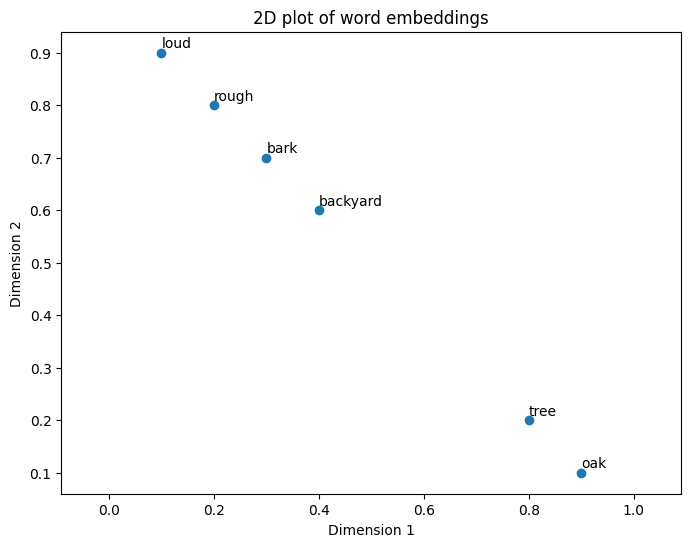

In [ ]:
import matplotlib.pyplot as plt

# Extract the coordinates for 2D plotting
x_2d_adj = [embeddings[word][0] for word in embeddings]
y_2d_adj = [embeddings[word][1] for word in embeddings]
words_2d_adj = list(embeddings.keys())

# Create a 2D plot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter the points
ax.scatter(x_2d_adj, y_2d_adj)

# Annotate the points with words
for i, word in enumerate(words_2d_adj):
    ax.text(x_2d_adj[i], y_2d_adj[i] + 0.01, word)  # Adjust text position for clarity

# Set labels
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('2D plot of word embeddings')

# Set equal scaling
ax.axis('equal')

# Show the plot
plt.show()

The rough bark of the oak tree. In this sentences bark and tree are related by context because a bark is a part of the tree.

we heard a loud bark from the backyard

In [ ]:
# Sentence 1
sentence_1 = ["rough","bark", "oak", "tree"]

# Initialize matrices for Q, K, V
Q_1 = np.array([embeddings[word] for word in sentence_1])
K_1 = np.array([embeddings[word] for word in sentence_1])
V_1 = np.array([embeddings[word] for word in sentence_1])

# Step 1: Similarity - Calculate dot products for Q and K (attention scores)
attention_scores_1 = Q_1.dot(K_1.T)

# Step 2: Weights - Apply softmax to attention scores
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

attention_weights_1 = np.apply_along_axis(softmax, 1, attention_scores_1)

# Step 3: Contextualized vector - Multiply attention weights by V and sum to get output vectors
attention_output_1 = attention_weights_1.dot(V_1)

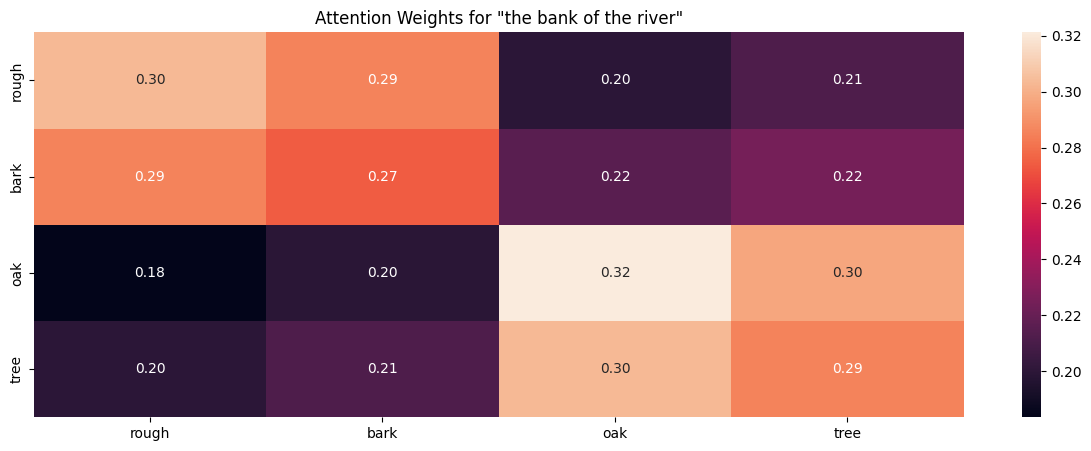

In [ ]:
import seaborn as sns

# Set up the plot
fig, axes = plt.subplots(1, 1, figsize=(15, 5))

# Sentence 1: "the bank of the river"
# Create a heatmap for the attention weights of the first sentence
sns.heatmap(attention_weights_1, annot=True, fmt=".2f", xticklabels=sentence_1, yticklabels=sentence_1)
axes.set_title('Attention Weights for "the bank of the river"')

plt.show()

In [ ]:
sentence_1.append('backyard')
sentence_1

['rough', 'bark', 'oak', 'tree', 'backyard']

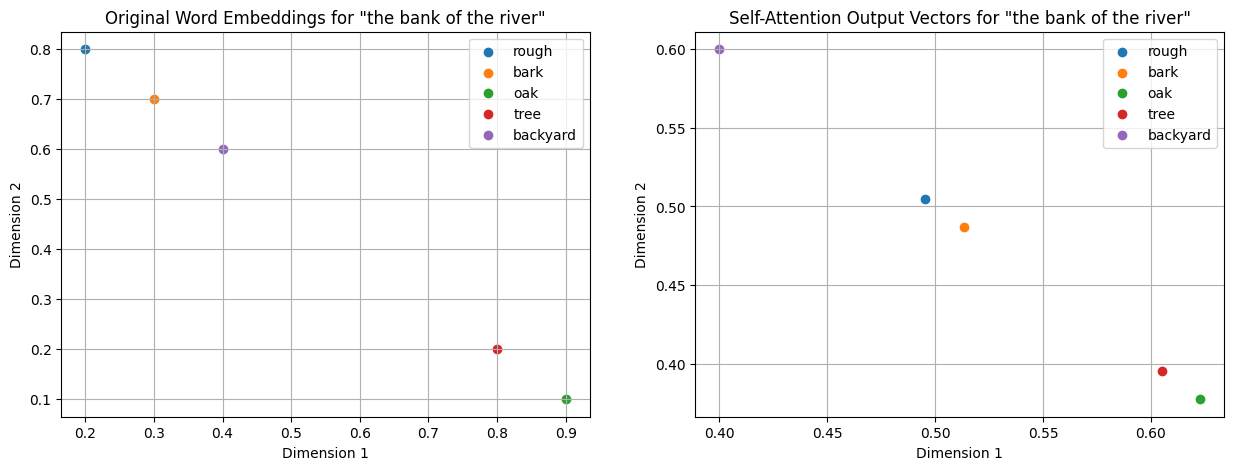

In [ ]:
# Plotting the original embeddings and the attention output for the first sentence "the bank of the river"

# Extract the relevant embeddings for the first sentence
sentence_embeddings_1 = np.array([embeddings[word] for word in sentence_1])

# Reconstruct attention_output_array_1 to match the current sentence_1
# attention_output_1 was calculated for the first 5 words.
# We need to append the embedding of 'backyard' to match the 6-word sentence_1.
attention_output_array_1 = np.concatenate((attention_output_1, embeddings['backyard'].reshape(1, -1)), axis=0)

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot original embeddings
for i, word in enumerate(sentence_1):
    axes[0].scatter(sentence_embeddings_1[i, 0], sentence_embeddings_1[i, 1], label=f"{word}")

axes[0].set_title('Original Word Embeddings for "the bank of the river"')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].grid(True)
axes[0].legend()

# Plot output vectors
for i, word in enumerate(sentence_1):
    axes[1].scatter(attention_output_array_1[i, 0], attention_output_array_1[i, 1], label=f"{word}")

axes[1].set_title('Self-Attention Output Vectors for "the bank of the river"')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].grid(True)
axes[1].legend()

plt.show()